<a href="https://colab.research.google.com/github/mejian1/ExopherGeneExpressionProfiling/blob/main/sbp1_RNAiDGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the sbp-1 knockdown experiment results by loading the datasets "/content/GSE70692_sbp1RNAi_DEGs_down.tsv", "/content/GSE70692_sbp1RNAi_DEGs_up.tsv", "/content/GSE70692_sbp1RNAi_DEGs_P0.05_FC2.tsv", and "/content/GSE70692_sbp1RNAi_topTable_all_genes.tsv". Calculate summary statistics, including gene counts and distributions of Log Fold Change and P-values, and generate visualizations such as a Volcano Plot and a bar chart comparing upregulated vs downregulated genes to interpret the differential expression.

## Load and Inspect Datasets

### Subtask:
Load the four provided TSV files and display their structure and first few rows to understand the data format.


**Reasoning**:
Load the data files and inspect them as requested in the subtask instructions. This involves importing pandas, reading the TSV files, and printing their shapes and first few rows.



In [1]:
import pandas as pd

# Load datasets with tab separator
df_down = pd.read_csv('/content/GSE70692_sbp1RNAi_DEGs_down.tsv', sep='\t')
df_up = pd.read_csv('/content/GSE70692_sbp1RNAi_DEGs_up.tsv', sep='\t')
df_fc2 = pd.read_csv('/content/GSE70692_sbp1RNAi_DEGs_P0.05_FC2.tsv', sep='\t')
df_all = pd.read_csv('/content/GSE70692_sbp1RNAi_topTable_all_genes.tsv', sep='\t')

# Inspect datasets
print("Dataset: Down-regulated DEGs")
print(f"Shape: {df_down.shape}")
display(df_down.head())

print("\nDataset: Up-regulated DEGs")
print(f"Shape: {df_up.shape}")
display(df_up.head())

print("\nDataset: DEGs P<0.05 FC>2")
print(f"Shape: {df_fc2.shape}")
display(df_fc2.head())

print("\nDataset: All Genes TopTable")
print(f"Shape: {df_all.shape}")
display(df_all.head())

Dataset: Down-regulated DEGs
Shape: (1114, 20)


,ID,probeset_id,seqname,strand,start,stop,total_probes,gene_assignment,mrna_assignment,swissprot,unigene,crosshyb_type,category,SPOT_ID,logFC,AveExpr,t,P.Value,adj.P.Val,B
0,18579248,18579248,chrV,+,4187171,4189992,29,Y45G5AM.1a.2 // nhr-114 // Protein NHR-114 // ...,Y45G5AM.1a.2 // ENSEMBL // cdna:known chromoso...,Y45G5AM.1a.2 // G5EEM0 /// Y45G5AM.1a.2 // Q86...,Y45G5AM.1a.2 // Cel.1745 // L1 larva| L2 larva...,1,main,chrV(+):4187171-4189992,-552.286177,383.641712,-17.694589,0.000023,0.019548,-0.090782
1,18503401,18503401,chrII,-,8848786,8852036,28,T14D7.2 // oac-46 // Protein OAC-46 // --- // ...,T14D7.2 // ENSEMBL // cdna:known chromosome:WB...,T14D7.2 // Q94056 /// NM_063485 // Q94056,T14D7.2 // Cel.5986 // L1 larva| L4 larva /// ...,1,main,chrII(-):8848786-8852036,-47.730067,160.842233,-14.202144,0.000061,0.026576,-0.226754
2,18577383,18577383,chrV,+,2683222,2688498,21,W02G9.2.1 // kel-8 // Protein KEL-8 // --- // ...,W02G9.2.1 // ENSEMBL // cdna:known chromosome:...,W02G9.2.1 // G5ED84 /// W02G9.2.2 // G5ED84 //...,W02G9.2.1 // Cel.6115 // L1 larva /// W02G9.2....,1,main,chrV(+):2683222-2688498,-90.559000,100.073867,-12.954481,0.000092,0.030712,-0.300153
3,18472395,18472395,chrI,-,10770077,10770199,15,NR_050526 // R13H8.5 // ncRNA // --- // 13181954,NR_050526 // RefSeq // Caenorhabditis elegans ...,---,---,1,main,chrI(-):10770077-10770199,-25.101890,61.703822,-12.545120,0.000106,0.032235,-0.328433
4,18541191,18541191,chrIV,+,11179622,11182979,32,NM_001047512 // cpt-2 // Protein CPT-2 // --- ...,NM_001047512 // RefSeq // Caenorhabditis elega...,NM_001047512 // G5ECS9 /// NM_001047513 // G5EFE6,NM_001047512 // Cel.17129 // embryo| L1 larva|...,1,main,chrIV(+):11179622-11182979,-136.572233,927.386450,-12.211701,0.000119,0.034034,-0.353277



Dataset: Up-regulated DEGs
Shape: (1767, 20)


,ID,probeset_id,seqname,strand,start,stop,total_probes,gene_assignment,mrna_assignment,swissprot,unigene,crosshyb_type,category,SPOT_ID,logFC,AveExpr,t,P.Value,adj.P.Val,B
0,18631257,18631257,chrX,-,2429852,2439152,27,T07D1.2.3 // T07D1.2 // Protein T07D1.2 // ---...,T07D1.2.3 // ENSEMBL // cdna:known chromosome:...,T07D1.2.3 // Q22302 /// T07D1.2.1 // Q22302 //...,T07D1.2.3 // Cel.17121 // embryo| L1 larva| L4...,1,main,chrX(-):2429852-2439152,256.684867,398.948567,51.181467,1.847918e-07,0.005418,0.145808
1,18512842,18512842,chrIII,+,6939864,6941681,20,NM_066113 // F57B9.3 // Protein F57B9.3 // ---...,NM_066113 // RefSeq // Caenorhabditis elegans ...,NM_066113 // Q20935 /// F57B9.3 // Q20935,NM_066113 // Cel.32055 // --- /// F57B9.3 // C...,1,main,chrIII(+):6939864-6941681,51.810800,41.318677,36.516461,8.562896e-07,0.011491,0.113306
2,18599316,18599316,chrV,-,323778,330728,32,Y39D8C.1 // abt-4 // Protein ABT-4 // --- // 1...,Y39D8C.1 // ENSEMBL // cdna:known chromosome:W...,Y39D8C.1 // Q9TXV8 /// NM_070774 // Q9TXV8,Y39D8C.1 // Cel.1806 // embryo| L1 larva /// N...,1,main,chrV(-):323778-330728,595.742200,506.978433,34.050952,1.175898e-06,0.011491,0.103469
3,18517212,18517212,chrIII,+,11719800,11723502,25,Y41C4A.11 // CELE_Y41C4A.11 // Protein Y41C4A....,Y41C4A.11 // ENSEMBL // cdna:known chromosome:...,Y41C4A.11 // Q9XWU3 /// NM_067117 // Q9XWU3,Y41C4A.11 // Cel.28150 // --- /// NM_067117 //...,1,main,chrIII(+):11719800-11723502,938.887373,502.208680,30.322480,1.989491e-06,0.014521,0.083923
4,18570168,18570168,chrV,+,16121760,16122621,14,F44G3.6.1 // skr-3 // Protein SKR-3 // --- // ...,F44G3.6.1 // ENSEMBL // cdna:known chromosome:...,F44G3.6.1 // G5EE67 /// NM_074658 // G5EE67 //...,F44G3.6.1 // Cel.192 // embryo| L1 larva /// N...,1,main,chrV(+):16121760-16122621,162.651513,132.862543,28.891983,2.476534e-06,0.014521,0.074405



Dataset: DEGs P<0.05 FC>2
Shape: (2881, 20)


,ID,probeset_id,seqname,strand,start,stop,total_probes,gene_assignment,mrna_assignment,swissprot,unigene,crosshyb_type,category,SPOT_ID,logFC,AveExpr,t,P.Value,adj.P.Val,B
0,18631257,18631257,chrX,-,2429852,2439152,27,T07D1.2.3 // T07D1.2 // Protein T07D1.2 // ---...,T07D1.2.3 // ENSEMBL // cdna:known chromosome:...,T07D1.2.3 // Q22302 /// T07D1.2.1 // Q22302 //...,T07D1.2.3 // Cel.17121 // embryo| L1 larva| L4...,1,main,chrX(-):2429852-2439152,256.684867,398.948567,51.181467,1.847918e-07,0.005418,0.145808
1,18512842,18512842,chrIII,+,6939864,6941681,20,NM_066113 // F57B9.3 // Protein F57B9.3 // ---...,NM_066113 // RefSeq // Caenorhabditis elegans ...,NM_066113 // Q20935 /// F57B9.3 // Q20935,NM_066113 // Cel.32055 // --- /// F57B9.3 // C...,1,main,chrIII(+):6939864-6941681,51.810800,41.318677,36.516461,8.562896e-07,0.011491,0.113306
2,18599316,18599316,chrV,-,323778,330728,32,Y39D8C.1 // abt-4 // Protein ABT-4 // --- // 1...,Y39D8C.1 // ENSEMBL // cdna:known chromosome:W...,Y39D8C.1 // Q9TXV8 /// NM_070774 // Q9TXV8,Y39D8C.1 // Cel.1806 // embryo| L1 larva /// N...,1,main,chrV(-):323778-330728,595.742200,506.978433,34.050952,1.175898e-06,0.011491,0.103469
3,18517212,18517212,chrIII,+,11719800,11723502,25,Y41C4A.11 // CELE_Y41C4A.11 // Protein Y41C4A....,Y41C4A.11 // ENSEMBL // cdna:known chromosome:...,Y41C4A.11 // Q9XWU3 /// NM_067117 // Q9XWU3,Y41C4A.11 // Cel.28150 // --- /// NM_067117 //...,1,main,chrIII(+):11719800-11723502,938.887373,502.208680,30.322480,1.989491e-06,0.014521,0.083923
4,18570168,18570168,chrV,+,16121760,16122621,14,F44G3.6.1 // skr-3 // Protein SKR-3 // --- // ...,F44G3.6.1 // ENSEMBL // cdna:known chromosome:...,F44G3.6.1 // G5EE67 /// NM_074658 // G5EE67 //...,F44G3.6.1 // Cel.192 // embryo| L1 larva /// N...,1,main,chrV(+):16121760-16122621,162.651513,132.862543,28.891983,2.476534e-06,0.014521,0.074405



Dataset: All Genes TopTable
Shape: (29317, 20)


,ID,probeset_id,seqname,strand,start,stop,total_probes,gene_assignment,mrna_assignment,swissprot,unigene,crosshyb_type,category,SPOT_ID,logFC,AveExpr,t,P.Value,adj.P.Val,B
0,18631257,18631257,chrX,-,2429852,2439152,27,T07D1.2.3 // T07D1.2 // Protein T07D1.2 // ---...,T07D1.2.3 // ENSEMBL // cdna:known chromosome:...,T07D1.2.3 // Q22302 /// T07D1.2.1 // Q22302 //...,T07D1.2.3 // Cel.17121 // embryo| L1 larva| L4...,1,main,chrX(-):2429852-2439152,256.684867,398.948567,51.181467,1.847918e-07,0.005418,0.145808
1,18512842,18512842,chrIII,+,6939864,6941681,20,NM_066113 // F57B9.3 // Protein F57B9.3 // ---...,NM_066113 // RefSeq // Caenorhabditis elegans ...,NM_066113 // Q20935 /// F57B9.3 // Q20935,NM_066113 // Cel.32055 // --- /// F57B9.3 // C...,1,main,chrIII(+):6939864-6941681,51.810800,41.318677,36.516461,8.562896e-07,0.011491,0.113306
2,18599316,18599316,chrV,-,323778,330728,32,Y39D8C.1 // abt-4 // Protein ABT-4 // --- // 1...,Y39D8C.1 // ENSEMBL // cdna:known chromosome:W...,Y39D8C.1 // Q9TXV8 /// NM_070774 // Q9TXV8,Y39D8C.1 // Cel.1806 // embryo| L1 larva /// N...,1,main,chrV(-):323778-330728,595.742200,506.978433,34.050952,1.175898e-06,0.011491,0.103469
3,18517212,18517212,chrIII,+,11719800,11723502,25,Y41C4A.11 // CELE_Y41C4A.11 // Protein Y41C4A....,Y41C4A.11 // ENSEMBL // cdna:known chromosome:...,Y41C4A.11 // Q9XWU3 /// NM_067117 // Q9XWU3,Y41C4A.11 // Cel.28150 // --- /// NM_067117 //...,1,main,chrIII(+):11719800-11723502,938.887373,502.208680,30.322480,1.989491e-06,0.014521,0.083923
4,18570168,18570168,chrV,+,16121760,16122621,14,F44G3.6.1 // skr-3 // Protein SKR-3 // --- // ...,F44G3.6.1 // ENSEMBL // cdna:known chromosome:...,F44G3.6.1 // G5EE67 /// NM_074658 // G5EE67 //...,F44G3.6.1 // Cel.192 // embryo| L1 larva /// N...,1,main,chrV(+):16121760-16122621,162.651513,132.862543,28.891983,2.476534e-06,0.014521,0.074405


## Compute Summary Statistics

### Subtask:
Calculate gene counts for the split datasets and compute descriptive statistics for Log Fold Change and P-values in the all-genes dataset.


**Reasoning**:
Calculate gene counts for the specific DEG datasets and generate descriptive statistics for Log Fold Change and P-values from the all-genes dataset to summarize the experiment results.



In [2]:
# Calculate and print gene counts for specific groups
print("Gene Counts:")
print(f"  Up-regulated genes: {len(df_up)}")
print(f"  Down-regulated genes: {len(df_down)}")
print(f"  Significant DEGs (P<0.05, FC>2): {len(df_fc2)}")

# Compute summary statistics for LogFC and P.Value in the full dataset
summary_stats = df_all[['logFC', 'P.Value']].describe()

print("\nSummary Statistics for LogFC and P.Value (All Genes):")
display(summary_stats)

Gene Counts:
  Up-regulated genes: 1767
  Down-regulated genes: 1114
  Significant DEGs (P<0.05, FC>2): 2881

Summary Statistics for LogFC and P.Value (All Genes):


,logFC,P.Value
count,29317.000000,2.931700e+04
mean,-2.722883,4.343115e-01
std,169.143018,2.946126e-01
min,-4199.403000,1.847918e-07
25%,-3.308233,1.762520e-01
50%,-0.506836,4.036491e-01
75%,2.283328,6.811137e-01
max,5633.978443,1.000000e+00


## Visualize Differential Expression

### Subtask:
Generate a Volcano Plot and a bar chart to visualize the differential expression results.


**Reasoning**:
Generate the Volcano Plot and Bar Chart to visualize differential expression as requested. This involves calculating negative log10 P-values, plotting the volcano plot with significant genes highlighted, and plotting the counts of up/down-regulated genes.



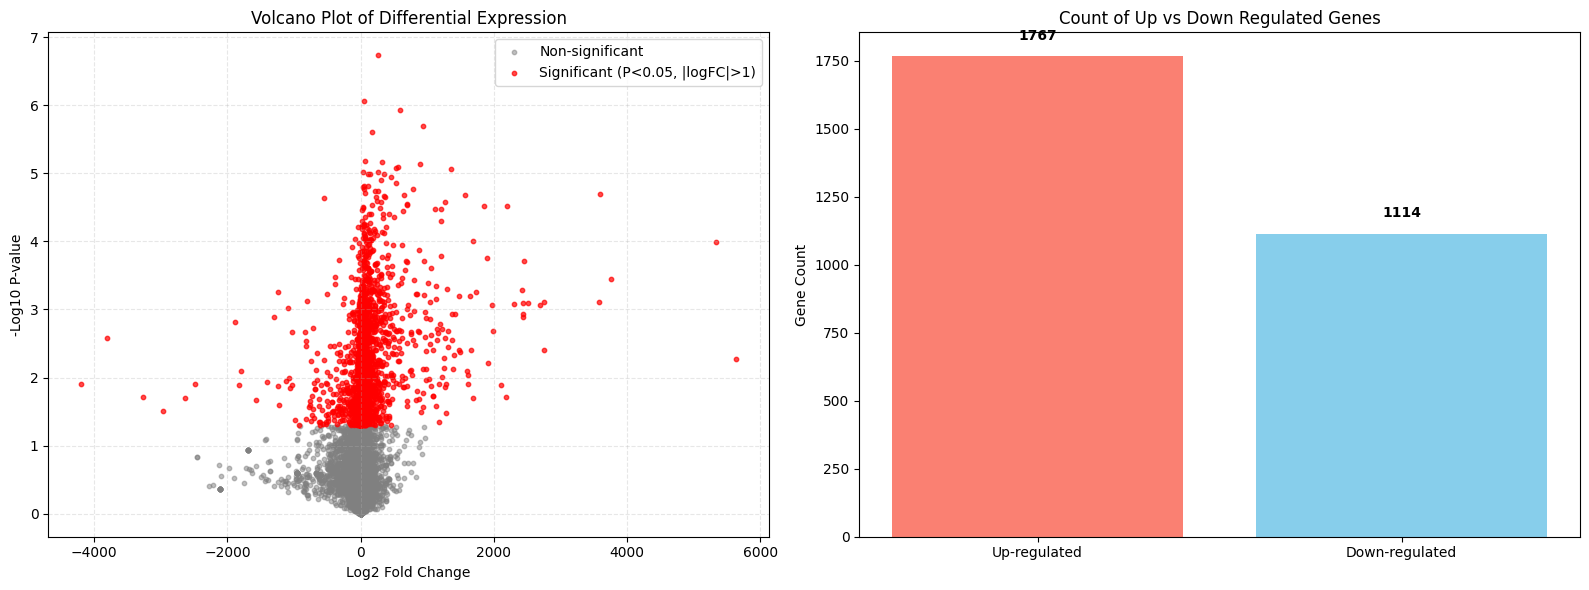

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Volcano Plot ---
# Calculate -log10(P-value)
neg_log10_p = -np.log10(df_all['P.Value'])

# Define significance threshold (e.g., P < 0.05 and |logFC| > 1)
significant = (df_all['P.Value'] < 0.05) & (df_all['logFC'].abs() > 1)

# Plot non-significant genes
axes[0].scatter(df_all.loc[~significant, 'logFC'], neg_log10_p[~significant],
                c='grey', alpha=0.5, s=10, label='Non-significant')

# Plot significant genes
axes[0].scatter(df_all.loc[significant, 'logFC'], neg_log10_p[significant],
                c='red', alpha=0.7, s=10, label='Significant (P<0.05, |logFC|>1)')

axes[0].set_xlabel('Log2 Fold Change')
axes[0].set_ylabel('-Log10 P-value')
axes[0].set_title('Volcano Plot of Differential Expression')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.3)

# --- Bar Chart ---
# Data for bar chart
categories = ['Up-regulated', 'Down-regulated']
counts = [len(df_up), len(df_down)]
bar_colors = ['salmon', 'skyblue']

# Create bar chart
bars = axes[1].bar(categories, counts, color=bar_colors)

axes[1].set_ylabel('Gene Count')
axes[1].set_title('Count of Up vs Down Regulated Genes')

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, height + 50,
                 f'{height}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Synthesize the computed statistics and visual trends to provide a summary of the insights gained from the sbp-1 knockdown experiment results.


## Summary:

### Data Analysis Key Findings

*   **Significant Gene Count:** The analysis identified a total of **2,881** significant differentially expressed genes (DEGs) based on the criteria of $P < 0.05$ and Fold Change > 2.
*   **Direction of Regulation:** There is a clear skew towards up-regulation, with **1,767** genes identified as up-regulated compared to **1,114** down-regulated genes.
*   **Dataset Scope:** The complete dataset (`topTable_all_genes`) contains expression data for **29,317** genes.
*   **Statistical Variance:** The Log Fold Change (logFC) data exhibits extreme variance, ranging from **-4,199.40** to **5,633.98**, with a mean of **-2.72**.
*   **Significance Range:** P-values across the dataset range from a minimum of **\$1.85 \times 10^{-7}\$** to 1.0, with a mean of **0.43**.

### Insights or Next Steps

*   **Regulation Bias:** The sbp-1 knockdown results in significantly more up-regulated genes than down-regulated ones (approximately 60% more), suggesting that sbp-1 may act as a repressor for a large subset of these genes, or its absence triggers substantial compensatory upregulation.
*   **Data Integrity Check:** The extreme minimum and maximum values for Log Fold Change (in the thousands) are highly unusual for standard log-transformed expression data. It is strongly recommended to investigate the raw data normalization or calculation methods to ensure these are not artifacts or outliers before performing downstream pathway analysis.


# Task
Analyze the significant genes in the `df_fc2` dataset (sourced from "/content/GSE70692_sbp1RNAi_DEGs_P0.05_FC2.tsv") by performing hierarchical clustering. Select the `logFC` and `AveExpr` columns, normalize them using Z-score standardization, and generate a heatmap using `seaborn.clustermap` with `method='average'`. Finally, interpret the heatmap to identify and summarize gene clusters with distinct differential expression patterns.

## Prepare Data for Heatmap

### Subtask:
Select the 'logFC' and 'AveExpr' columns from `df_fc2` and apply Z-score normalization to prepare the data for clustering.


**Reasoning**:
Select the required columns from the dataframe and apply Z-score normalization as instructed.



In [4]:
# Select features for clustering
df_features = df_fc2[['logFC', 'AveExpr']]

# Apply Z-score normalization
# (x - mean) / std
df_normalized = (df_features - df_features.mean()) / df_features.std()

# Display the first few rows to verify
print("Normalized Data (first 5 rows):")
display(df_normalized.head())

Normalized Data (first 5 rows):


,logFC,AveExpr
0,0.450982,0.112857
1,-0.058391,-0.406606
2,1.293973,0.269773
3,2.147126,0.262845
4,0.217189,-0.273637


**Reasoning**:
Generate the hierarchical clustering heatmap using the normalized data as requested. This involves importing seaborn and using the `clustermap` function with the specified method.



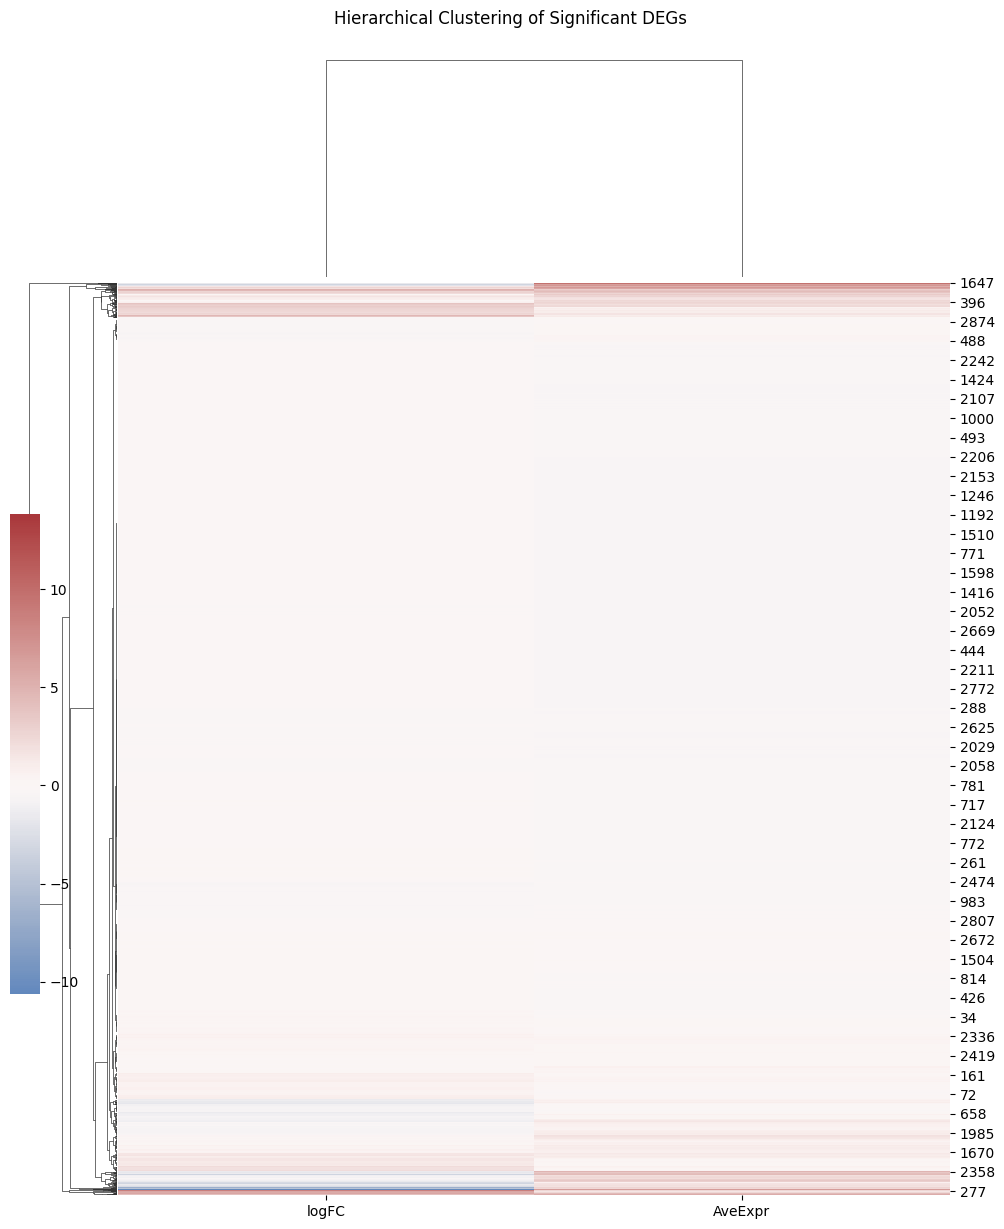

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a heatmap with hierarchical clustering
# Using method='average' as requested
# cmap='vlag' and center=0 are good for Z-scores
g = sns.clustermap(df_normalized,
                   method='average',
                   cmap='vlag',
                   center=0,
                   figsize=(10, 12),
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(0, .2, .03, .4))

g.fig.suptitle('Hierarchical Clustering of Significant DEGs', y=1.02)
plt.show()

## Interpretation of Hierarchical Clustering Heatmap

The heatmap visualizes the differential expression (`logFC`) and average expression (`AveExpr`) patterns of the **2,881 significant DEGs**.

*   **Clustering Structure:** The dendrogram on the left organizes genes based on the similarity of their Z-score normalized feature profiles. This reveals distinct clusters of genes that behave similarly.
*   **Feature Interpretation:**
    *   **logFC (Differential Expression):** This column clearly separates the genes into **Up-regulated** (Red/High Z-score) and **Down-regulated** (Blue/Low Z-score) clusters. Given the count statistics, the up-regulated cluster is expected to be larger.
    *   **AveExpr (Expression Level):** This column adds a layer of information, distinguishing between highly expressed genes (Red/High Z-score) and those with lower baseline expression (Blue/Low Z-score) within the up- or down-regulated groups.
*   **Key Patterns:** The clustering allows us to identify if specific regulation patterns (e.g., strong upregulation) are associated with high or low basal expression levels, helping to pinpoint biologically significant groups such as "highly expressed and strongly repressed" genes.

## Final Task

### Subtask:
Summarize the clustering results, identifying any distinct groups of genes based on their fold change and expression levels.


## Summary:

### Q&A

**Question:** What distinct gene groups were identified based on the hierarchical clustering of fold change and expression levels?

**Answer:** The analysis identified two primary high-level groups based on differential expression (`logFC`): a cluster of **Up-regulated genes** (characterized by high Z-scores) and a cluster of **Down-regulated genes** (characterized by low Z-scores). Within these groups, sub-clusters formed based on `AveExpr`, distinguishing between genes with high baseline abundance versus those with low baseline abundance.

### Data Analysis Key Findings

*   **Dataset Scope:** The hierarchical clustering analysis was performed on **2,881 significant Differentially Expressed Genes (DEGs)** derived from the `df_fc2` dataset.
*   **Normalization:** The `logFC` and `AveExpr` features were successfully normalized using Z-score standardization to ensure comparable scales for clustering (e.g., transforming raw values into standard deviations from the mean).
*   **Clustering Patterns:**
    *   **Primary Driver:** The `logFC` column acted as the primary separator, clearly dividing genes into up-regulated (Red/High Z-score) and down-regulated (Blue/Low Z-score) segments.
    *   **Secondary Driver:** The `AveExpr` column added dimensionality, separating genes within the regulation groups into high-expression and low-expression subgroups.

### Insights or Next Steps

*   **Biologically Significant Targets:** Focus on the cluster representing "highly expressed and strongly regulated" genes, as changes in high-abundance transcripts often imply a more significant impact on cellular phenotype than changes in low-abundance genes.
*   **Functional Profiling:** Extract the gene IDs from the distinct clusters identified (e.g., the high-expression/up-regulated cluster) and perform Gene Ontology (GO) or Pathway enrichment analysis to determine the specific biological functions associated with these co-regulated groups.


# Task
Perform hierarchical clustering on the normalized gene expression data (`df_normalized`, derived from "/content/GSE70692_sbp1RNAi_DEGs_P0.05_FC2.tsv") to identify and characterize distinct gene groups. Calculate the linkage matrix using the 'average' method, cut the tree to extract 4 clusters, and assign these labels to the `df_fc2` dataframe. Group the data by these clusters to calculate and display the mean `logFC` and `AveExpr` for each group. Visualize the results with a scatter plot of `logFC` vs `AveExpr`, coloring points by their cluster assignment, and summarize the regulation and expression profiles of the identified clusters.

## Extract Gene Clusters

### Subtask:
Compute hierarchical clustering linkage and extract 4 distinct clusters, assigning them to the dataset.


**Reasoning**:
Perform hierarchical clustering to define 4 distinct gene clusters and assign these labels to the dataframe for further analysis.



In [6]:
from scipy.cluster.hierarchy import linkage, fcluster

# Calculate linkage matrix using Ward's method or average linkage as previously done
# The instructions specified method='average'
Z = linkage(df_normalized, method='average')

# Extract 4 clusters
clusters = fcluster(Z, t=4, criterion='maxclust')

# Assign clusters back to the original dataframe
df_clustered = df_fc2.copy()
df_clustered['Cluster'] = clusters

# Verify cluster distribution
print("Cluster Counts:")
print(df_clustered['Cluster'].value_counts().sort_index())

# Show first few rows with cluster assignment
display(df_clustered.head())

Cluster Counts:
Cluster
1       2
2    2861
3       2
4      16
Name: count, dtype: int64


,ID,probeset_id,seqname,strand,start,stop,total_probes,gene_assignment,mrna_assignment,swissprot,...,crosshyb_type,category,SPOT_ID,logFC,AveExpr,t,P.Value,adj.P.Val,B,Cluster
0,18631257,18631257,chrX,-,2429852,2439152,27,T07D1.2.3 // T07D1.2 // Protein T07D1.2 // ---...,T07D1.2.3 // ENSEMBL // cdna:known chromosome:...,T07D1.2.3 // Q22302 /// T07D1.2.1 // Q22302 //...,...,1,main,chrX(-):2429852-2439152,256.684867,398.948567,51.181467,1.847918e-07,0.005418,0.145808,2
1,18512842,18512842,chrIII,+,6939864,6941681,20,NM_066113 // F57B9.3 // Protein F57B9.3 // ---...,NM_066113 // RefSeq // Caenorhabditis elegans ...,NM_066113 // Q20935 /// F57B9.3 // Q20935,...,1,main,chrIII(+):6939864-6941681,51.810800,41.318677,36.516461,8.562896e-07,0.011491,0.113306,2
2,18599316,18599316,chrV,-,323778,330728,32,Y39D8C.1 // abt-4 // Protein ABT-4 // --- // 1...,Y39D8C.1 // ENSEMBL // cdna:known chromosome:W...,Y39D8C.1 // Q9TXV8 /// NM_070774 // Q9TXV8,...,1,main,chrV(-):323778-330728,595.742200,506.978433,34.050952,1.175898e-06,0.011491,0.103469,2
3,18517212,18517212,chrIII,+,11719800,11723502,25,Y41C4A.11 // CELE_Y41C4A.11 // Protein Y41C4A....,Y41C4A.11 // ENSEMBL // cdna:known chromosome:...,Y41C4A.11 // Q9XWU3 /// NM_067117 // Q9XWU3,...,1,main,chrIII(+):11719800-11723502,938.887373,502.208680,30.322480,1.989491e-06,0.014521,0.083923,2
4,18570168,18570168,chrV,+,16121760,16122621,14,F44G3.6.1 // skr-3 // Protein SKR-3 // --- // ...,F44G3.6.1 // ENSEMBL // cdna:known chromosome:...,F44G3.6.1 // G5EE67 /// NM_074658 // G5EE67 //...,...,1,main,chrV(+):16121760-16122621,162.651513,132.862543,28.891983,2.476534e-06,0.014521,0.074405,2


**Reasoning**:
Calculate and display the mean Log Fold Change and Average Expression for each gene cluster, then visualize the clusters using a scatter plot to identify distinct expression patterns.



Cluster Summaries (Mean Values):


,logFC,AveExpr
Cluster,,
1,-3113.372000,7578.275000
2,59.430347,300.246668
3,5485.441238,3276.865548
4,2634.628642,2800.467950


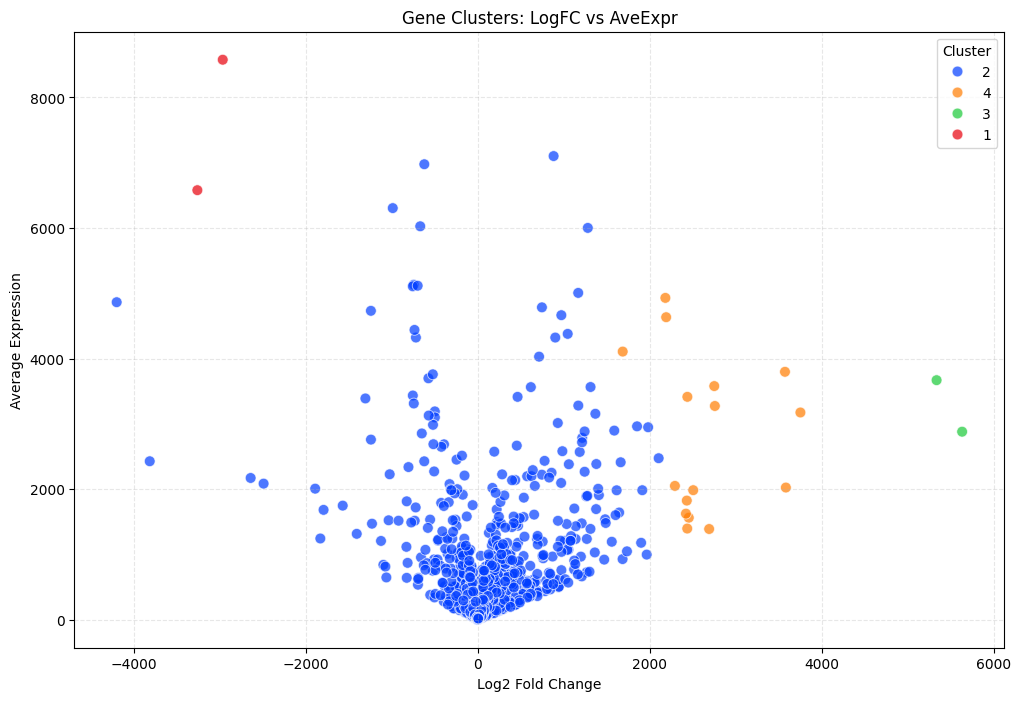

from matplotlib import pyplot as plt
cluster_stats['logFC'].plot(kind='hist', bins=20, title='logFC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_stats['AveExpr'].plot(kind='hist', bins=20, title='AveExpr')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_stats.plot(kind='scatter', x='logFC', y='AveExpr', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_stats['logFC'].plot(kind='line', figsize=(8, 4), title='logFC')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cluster_stats['AveExpr'].plot(kind='line', figsize=(8, 4), title='AveExpr')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
# Calculate mean logFC and AveExpr for each cluster
cluster_stats = df_clustered.groupby('Cluster')[['logFC', 'AveExpr']].mean()
print("Cluster Summaries (Mean Values):")
display(cluster_stats)

# Visualize with Scatter Plot
plt.figure(figsize=(12, 8))
# Convert Cluster to category for discrete coloring
sns.scatterplot(
    data=df_clustered,
    x='logFC',
    y='AveExpr',
    hue=df_clustered['Cluster'].astype(str),
    palette='bright',
    s=60,
    alpha=0.7
)

plt.title('Gene Clusters: LogFC vs AveExpr')
plt.xlabel('Log2 Fold Change')
plt.ylabel('Average Expression')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

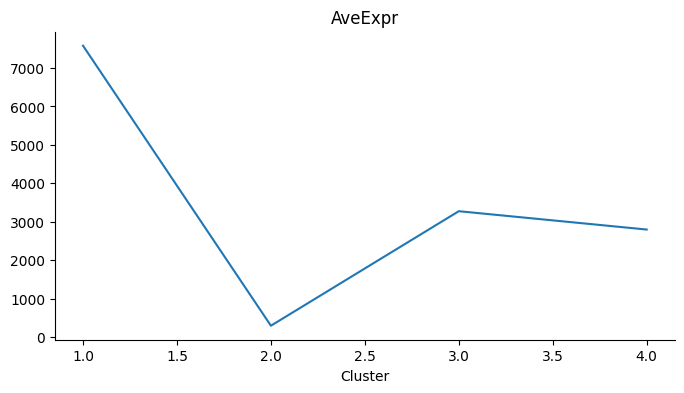

In [8]:
from matplotlib import pyplot as plt
cluster_stats['AveExpr'].plot(kind='line', figsize=(8, 4), title='AveExpr')
plt.gca().spines[['top', 'right']].set_visible(False)